In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Serif'})
import statsmodels.api as sm 

# Preprocessing

In [2]:
dataset = pd.read_csv('population.csv')
y1 = dataset.iloc[:, 1:2].values
y2 = dataset.iloc[:, 2:].values
X = dataset.iloc[:, 0].values

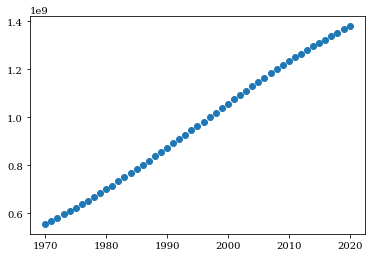

In [3]:
plt.scatter(X, y1)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y1)

LinearRegression()

# Linear Regression

In [5]:
pred = regressor.predict(X)

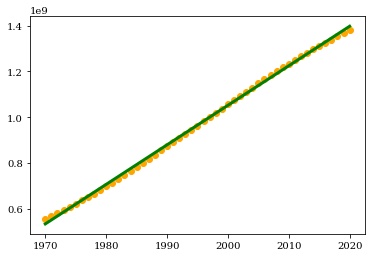

In [6]:
plt.scatter(X, y1, c = 'orange')
plt.plot(X, pred, c = 'green', lw = 3)
plt.show()

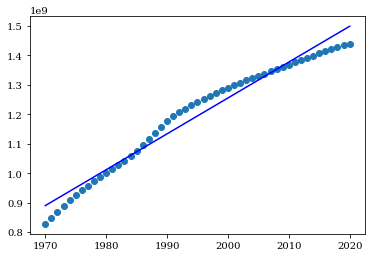

In [7]:
plt.scatter(X, y2)
regressor.fit(X, y2)
pred2 = regressor.predict(X)
plt.plot(X, pred2, c = 'blue')

# Polynomial Regression

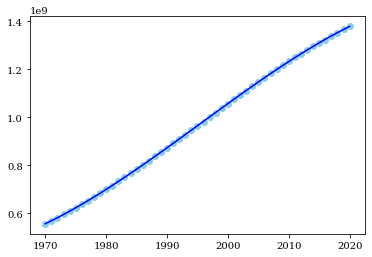

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y1.reshape(-1, 1))
y_pred = lin_reg.predict(X_poly)
plt.scatter(X, y1, c = 'skyblue')
plt.plot(X, y_pred, c = 'blue')
plt.show()

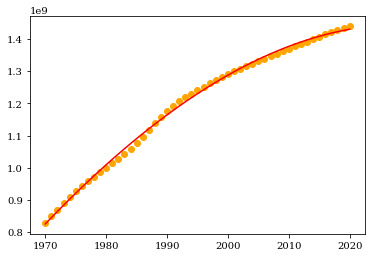

In [9]:
poly_reg2 = PolynomialFeatures(degree = 3)
X_poly = poly_reg2.fit_transform(X.reshape(-1, 1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y2.reshape(-1, 1))
y_pred2 = lin_reg2.predict(X_poly)
plt.scatter(X, y2, c = 'orange')
plt.plot(X, y_pred2, c = 'red')
plt.show()

# Predicting

In [10]:
predicters = pd.DataFrame(data = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050], columns=['Years'])

In [11]:
ind_poly_preds = pd.DataFrame(lin_reg.predict(poly_reg.fit_transform(predicters)), columns=['India Predicted'])
ind_poly_preds.shape[0]

31

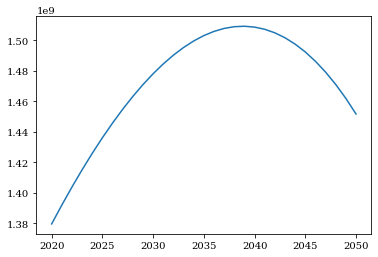

In [12]:
plt.plot(predicters, ind_poly_preds)

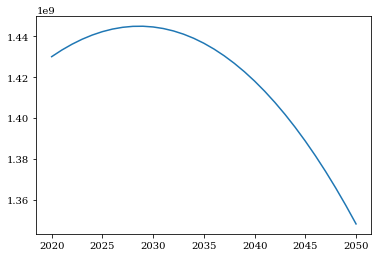

In [13]:
china_poly_preds = pd.DataFrame(lin_reg2.predict(poly_reg2.fit_transform(predicters)), columns=['China Predicted'])
china_poly_preds.shape[0]
plt.plot(predicters, china_poly_preds)

In [14]:
pred_dataset = pd.concat([predicters, ind_poly_preds, china_poly_preds], axis = 1)

In [15]:
pred_dataset

,Years,India Predicted,China Predicted
0,2020,1.379513e+09,1.430078e+09
1,2021,1.391861e+09,1.433314e+09
2,2022,1.403707e+09,1.436160e+09
3,2023,1.415030e+09,1.438615e+09
4,2024,1.425812e+09,1.440677e+09
5,2025,1.436033e+09,1.442342e+09
6,2026,1.445672e+09,1.443608e+09
7,2027,1.454711e+09,1.444472e+09
8,2028,1.463130e+09,1.444934e+09
9,2029,1.470909e+09,1.444989e+09


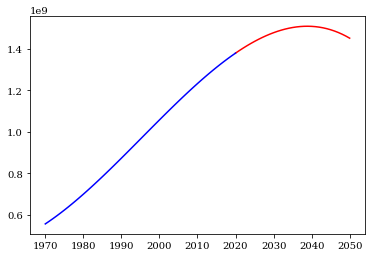

In [16]:
#plt.scatter(X, y1, c = 'skyblue')
#plt.scatter(predicters, ind_poly_preds, c = 'orange')
plt.plot(predicters, ind_poly_preds, c = 'red')
plt.plot(X, y_pred, c = 'blue')
plt.show()

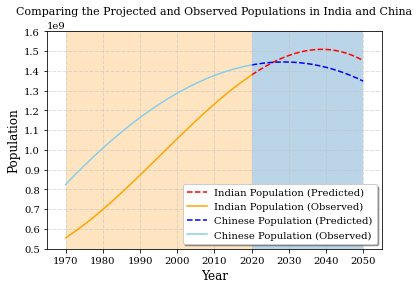

In [29]:
#plt.scatter(X, y2, c = '#c0fefc')
#plt.scatter(predicters, china_poly_preds, c = '#c0fefc')
#plt.scatter(X, y1, c = '#f5f7b2')
#plt.scatter(predicters, ind_poly_preds, c = '#f5f7b2')
plt.plot(predicters, ind_poly_preds, c = 'red', label = 'Indian Population (Predicted)', ls = '--')
plt.plot(X, y_pred, c = 'orange', label = 'Indian Population (Observed)')
plt.plot(predicters, china_poly_preds, c = 'blue', label = 'Chinese Population (Predicted)', ls = '--')
plt.plot(X, y_pred2, c = 'skyblue', label = 'Chinese Population (Observed)')
plt.xticks([1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050], rotation = 0)
plt.yticks([0.5e9, 0.6e9, 0.7e9, 0.8e9, 0.9e9, 1e9, 1.1e9, 1.2e9, 1.3e9, 1.4e9, 1.5e9, 1.6e9])
plt.ylim(0.5e9, 1.6e9)
plt.xlim(1965, 2055)
plt.axvspan(2020, 2050, alpha=0.3)
plt.axvspan(1970, 2020, alpha=0.3, facecolor = '#fea82f')
plt.xlabel('Year', size = 12)
plt.ylabel('Population', size = 12)
plt.title('Comparing the Projected and Observed Populations in India and China', size = 11)
plt.ticklabel_format(useOffset=True)
plt.legend(shadow = True)
plt.grid(linewidth = 0.5, ls = '-.', c = 'silver')
ttl = plt.gca().title
ttl.set_position([.5, 1.05])
plt.savefig('Graph 1', dpi = 500)
plt.show()